In [1]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from imutils import rotate_bound
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
myFolder = "images-5"
imagepaths = set() 

for root, dirs, files in os.walk(myFolder):
    for fileName in files:
        imagepaths.add( os.path.join( root[len(myFolder):], fileName ))

In [3]:
print(len(imagepaths))
print(imagepaths)

6000
{'/44-nothing/nothing2023.jpg', '/44-nothing/nothing769.jpg', '/44-nothing/nothing2899.jpg', '/44-nothing/nothing373.jpg', '/33-C/C639.jpg', '/33-C/C679.jpg', '/44-nothing/nothing735.jpg', '/44-nothing/nothing2482.jpg', '/44-nothing/nothing2964.jpg', '/33-C/C246.jpg', '/33-C/C96.jpg', '/44-nothing/nothing932.jpg', '/44-nothing/nothing1671.jpg', '/44-nothing/nothing411.jpg', '/44-nothing/nothing1122.jpg', '/44-nothing/nothing543.jpg', '/44-nothing/nothing795.jpg', '/44-nothing/nothing1074.jpg', '/33-C/C695.jpg', '/44-nothing/nothing1524.jpg', '/44-nothing/nothing865.jpg', '/44-nothing/nothing1750.jpg', '/33-C/C1180.jpg', '/44-nothing/nothing3000.jpg', '/44-nothing/nothing1814.jpg', '/33-C/C2821.jpg', '/44-nothing/nothing1711.jpg', '/44-nothing/nothing251.jpg', '/33-C/C2525.jpg', '/33-C/C2677.jpg', '/33-C/C341.jpg', '/44-nothing/nothing2845.jpg', '/44-nothing/nothing2861.jpg', '/33-C/C209.jpg', '/33-C/C2547.jpg', '/33-C/C2332.jpg', '/44-nothing/nothing948.jpg', '/33-C/C77.jpg', '/44

In [4]:
def process_image(path):
    new_image = cv2.imread(myFolder + path)
    
    connectivity = 4
    flags = connectivity
    flags |= cv2.FLOODFILL_FIXED_RANGE
    tolerancia = 50
    width = new_image.shape[1]
    height = new_image.shape[0]

    new_image = cv2.floodFill(new_image, None, (height//2, width//2), (255), (tolerancia,) * 3, (tolerancia,) * 3, flags)
    
    
    new_image=cv2.threshold(new_image[1],254,255,cv2.THRESH_BINARY)

    return new_image[1][:,:,0]

X = [] # Image data
y = [] # Labels# Loops through imagepaths to load images and labels into arrays

for path in imagepaths:
    X.append(process_image(path))

    # Processing label in image path
    category = path.split("/")[1]
    label = int(category[0]) # We need to convert 10_down to 00_down, or else it crashes
    y.append(label)

(6000, 200, 200)


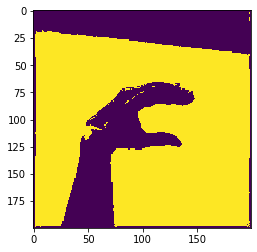

In [10]:
X=np.array(X, dtype = np.uint8)
y = np.array(y)
print(X.shape)

plt.imshow(X[4])

In [8]:
new_X = cv2.cvtColor(X[0], cv2.COLOR_BGR2GRAY)

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = (cv::impl::<unnamed>::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [11]:
for pic in range(len(X)):
    if(y[pic]==3):
        writeStatus =  cv2.imwrite( "images-6/33-C/Binary_Image_"+str(pic)+".jpg", X[pic] )
        if writeStatus is True:
            print("Guardado C: " + str(pic))
        else:
            print("Problema con C")
    elif(y[pic]==4):
        writeStatus =  cv2.imwrite( "images-6/44-nothing/Binary_Image_"+str(pic)+".jpg", X[pic] )
        if writeStatus is True:
            print("Guardado nothing: " + str(pic))
        else:
            print("Problema con nothing")


Guardado nothing: 0
Guardado nothing: 1
Guardado nothing: 2
Guardado nothing: 3
Guardado C: 4
Guardado C: 5
Guardado nothing: 6
Guardado nothing: 7
Guardado nothing: 8
Guardado C: 9
Guardado C: 10
Guardado nothing: 11
Guardado nothing: 12
Guardado nothing: 13
Guardado nothing: 14
Guardado nothing: 15
Guardado nothing: 16
Guardado nothing: 17
Guardado C: 18
Guardado nothing: 19
Guardado nothing: 20
Guardado nothing: 21
Guardado C: 22
Guardado nothing: 23
Guardado nothing: 24
Guardado C: 25
Guardado nothing: 26
Guardado nothing: 27
Guardado C: 28
Guardado C: 29
Guardado C: 30
Guardado nothing: 31
Guardado nothing: 32
Guardado C: 33
Guardado C: 34
Guardado C: 35
Guardado nothing: 36
Guardado C: 37
Guardado nothing: 38
Guardado C: 39
Guardado nothing: 40
Guardado C: 41
Guardado C: 42
Guardado nothing: 43
Guardado nothing: 44
Guardado C: 45
Guardado nothing: 46
Guardado C: 47
Guardado C: 48
Guardado C: 49
Guardado nothing: 50
Guardado C: 51
Guardado nothing: 52
Guardado nothing: 53
Guardado

Guardado nothing: 902
Guardado C: 903
Guardado nothing: 904
Guardado C: 905
Guardado nothing: 906
Guardado C: 907
Guardado nothing: 908
Guardado nothing: 909
Guardado C: 910
Guardado nothing: 911
Guardado C: 912
Guardado C: 913
Guardado nothing: 914
Guardado C: 915
Guardado C: 916
Guardado nothing: 917
Guardado nothing: 918
Guardado nothing: 919
Guardado nothing: 920
Guardado nothing: 921
Guardado nothing: 922
Guardado C: 923
Guardado C: 924
Guardado nothing: 925
Guardado nothing: 926
Guardado C: 927
Guardado C: 928
Guardado C: 929
Guardado C: 930
Guardado C: 931
Guardado C: 932
Guardado nothing: 933
Guardado nothing: 934
Guardado C: 935
Guardado C: 936
Guardado C: 937
Guardado C: 938
Guardado nothing: 939
Guardado nothing: 940
Guardado nothing: 941
Guardado C: 942
Guardado nothing: 943
Guardado C: 944
Guardado nothing: 945
Guardado C: 946
Guardado C: 947
Guardado nothing: 948
Guardado nothing: 949
Guardado C: 950
Guardado C: 951
Guardado nothing: 952
Guardado nothing: 953
Guardado not

Guardado nothing: 1876
Guardado C: 1877
Guardado nothing: 1878
Guardado C: 1879
Guardado C: 1880
Guardado C: 1881
Guardado nothing: 1882
Guardado C: 1883
Guardado C: 1884
Guardado nothing: 1885
Guardado nothing: 1886
Guardado nothing: 1887
Guardado C: 1888
Guardado nothing: 1889
Guardado nothing: 1890
Guardado C: 1891
Guardado C: 1892
Guardado nothing: 1893
Guardado C: 1894
Guardado nothing: 1895
Guardado nothing: 1896
Guardado C: 1897
Guardado nothing: 1898
Guardado C: 1899
Guardado C: 1900
Guardado nothing: 1901
Guardado C: 1902
Guardado C: 1903
Guardado C: 1904
Guardado C: 1905
Guardado C: 1906
Guardado C: 1907
Guardado C: 1908
Guardado C: 1909
Guardado C: 1910
Guardado C: 1911
Guardado nothing: 1912
Guardado C: 1913
Guardado C: 1914
Guardado C: 1915
Guardado nothing: 1916
Guardado nothing: 1917
Guardado C: 1918
Guardado C: 1919
Guardado C: 1920
Guardado C: 1921
Guardado nothing: 1922
Guardado nothing: 1923
Guardado nothing: 1924
Guardado C: 1925
Guardado nothing: 1926
Guardado noth

Guardado nothing: 2887
Guardado nothing: 2888
Guardado C: 2889
Guardado C: 2890
Guardado C: 2891
Guardado nothing: 2892
Guardado nothing: 2893
Guardado C: 2894
Guardado C: 2895
Guardado nothing: 2896
Guardado nothing: 2897
Guardado nothing: 2898
Guardado C: 2899
Guardado nothing: 2900
Guardado C: 2901
Guardado nothing: 2902
Guardado nothing: 2903
Guardado C: 2904
Guardado C: 2905
Guardado nothing: 2906
Guardado C: 2907
Guardado C: 2908
Guardado nothing: 2909
Guardado nothing: 2910
Guardado nothing: 2911
Guardado C: 2912
Guardado nothing: 2913
Guardado nothing: 2914
Guardado C: 2915
Guardado C: 2916
Guardado nothing: 2917
Guardado nothing: 2918
Guardado nothing: 2919
Guardado C: 2920
Guardado C: 2921
Guardado C: 2922
Guardado nothing: 2923
Guardado C: 2924
Guardado C: 2925
Guardado C: 2926
Guardado C: 2927
Guardado nothing: 2928
Guardado nothing: 2929
Guardado C: 2930
Guardado C: 2931
Guardado nothing: 2932
Guardado nothing: 2933
Guardado nothing: 2934
Guardado nothing: 2935
Guardado no

Guardado nothing: 3897
Guardado nothing: 3898
Guardado C: 3899
Guardado nothing: 3900
Guardado C: 3901
Guardado nothing: 3902
Guardado nothing: 3903
Guardado nothing: 3904
Guardado nothing: 3905
Guardado C: 3906
Guardado C: 3907
Guardado nothing: 3908
Guardado nothing: 3909
Guardado nothing: 3910
Guardado C: 3911
Guardado C: 3912
Guardado nothing: 3913
Guardado C: 3914
Guardado C: 3915
Guardado C: 3916
Guardado nothing: 3917
Guardado C: 3918
Guardado nothing: 3919
Guardado nothing: 3920
Guardado nothing: 3921
Guardado nothing: 3922
Guardado C: 3923
Guardado C: 3924
Guardado nothing: 3925
Guardado C: 3926
Guardado C: 3927
Guardado nothing: 3928
Guardado nothing: 3929
Guardado C: 3930
Guardado nothing: 3931
Guardado C: 3932
Guardado C: 3933
Guardado nothing: 3934
Guardado nothing: 3935
Guardado nothing: 3936
Guardado C: 3937
Guardado C: 3938
Guardado nothing: 3939
Guardado nothing: 3940
Guardado nothing: 3941
Guardado nothing: 3942
Guardado nothing: 3943
Guardado C: 3944
Guardado C: 3945

Guardado C: 4903
Guardado C: 4904
Guardado nothing: 4905
Guardado C: 4906
Guardado nothing: 4907
Guardado C: 4908
Guardado nothing: 4909
Guardado C: 4910
Guardado C: 4911
Guardado nothing: 4912
Guardado C: 4913
Guardado nothing: 4914
Guardado nothing: 4915
Guardado nothing: 4916
Guardado nothing: 4917
Guardado C: 4918
Guardado nothing: 4919
Guardado C: 4920
Guardado nothing: 4921
Guardado nothing: 4922
Guardado C: 4923
Guardado nothing: 4924
Guardado nothing: 4925
Guardado C: 4926
Guardado C: 4927
Guardado nothing: 4928
Guardado C: 4929
Guardado nothing: 4930
Guardado nothing: 4931
Guardado C: 4932
Guardado nothing: 4933
Guardado C: 4934
Guardado C: 4935
Guardado C: 4936
Guardado nothing: 4937
Guardado nothing: 4938
Guardado nothing: 4939
Guardado nothing: 4940
Guardado nothing: 4941
Guardado nothing: 4942
Guardado nothing: 4943
Guardado nothing: 4944
Guardado C: 4945
Guardado nothing: 4946
Guardado C: 4947
Guardado nothing: 4948
Guardado nothing: 4949
Guardado nothing: 4950
Guardado C

Guardado nothing: 5882
Guardado nothing: 5883
Guardado C: 5884
Guardado nothing: 5885
Guardado C: 5886
Guardado C: 5887
Guardado C: 5888
Guardado C: 5889
Guardado nothing: 5890
Guardado nothing: 5891
Guardado nothing: 5892
Guardado nothing: 5893
Guardado nothing: 5894
Guardado nothing: 5895
Guardado nothing: 5896
Guardado C: 5897
Guardado nothing: 5898
Guardado nothing: 5899
Guardado C: 5900
Guardado nothing: 5901
Guardado nothing: 5902
Guardado C: 5903
Guardado nothing: 5904
Guardado C: 5905
Guardado C: 5906
Guardado C: 5907
Guardado nothing: 5908
Guardado C: 5909
Guardado C: 5910
Guardado C: 5911
Guardado nothing: 5912
Guardado C: 5913
Guardado C: 5914
Guardado nothing: 5915
Guardado nothing: 5916
Guardado nothing: 5917
Guardado C: 5918
Guardado C: 5919
Guardado C: 5920
Guardado C: 5921
Guardado C: 5922
Guardado C: 5923
Guardado nothing: 5924
Guardado nothing: 5925
Guardado nothing: 5926
Guardado nothing: 5927
Guardado nothing: 5928
Guardado nothing: 5929
Guardado C: 5930
Guardado C:

In [55]:
for path in imagepaths:
    img = cv2.imread(myFolder + path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    break
    
print(img)

3


In [13]:
len(X)

9000

In [4]:

y = np.array(y)
y = to_categorical(y)




print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

Images loaded:  9000
Labels loaded:  9000


In [16]:
import pickle

pickle_out = open('pickles/X3.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('pickles/y3.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
print(len(X[0][0][0]))

3


In [5]:
X_train, X_aux, y_train, y_aux = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_aux, y_aux, test_size=.5, random_state=42, stratify=y_aux)

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adadelta
#from keras.models import Model
#from keras.applications import VGG16

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(200, 200, 0), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',  
    metrics=['accuracy'])

W0806 12:33:46.910794 139790604293952 deprecation_wrapper.py:119] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 12:33:46.932269 139790604293952 deprecation_wrapper.py:119] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 12:33:46.934844 139790604293952 deprecation_wrapper.py:119] From /home/alfonso/miniconda3/envs/final_project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [21]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [1]:
model.fit(np.array(X_train, dtype = 'int8'), y_train, epochs=5, batch_size=64, verbose=2, validation_data=(np.array(X_val, dtype = 'int8'), y_val))

NameError: name 'model' is not defined